In [1]:
import scipy as sp
from scipy import stats, optimize, interpolate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

# 33절: 결합확률과 조건부확률

# 다변수 이산확률변수의 결합/조건부확률

## 다변수 이산확률변수

카테고리 값을 가질 수 있는 이산확률변수가 두 개 이상 있는 경우 확률분포 쌍이 가지는 복합적인 확률분포를 살펴보아야 한다.

$P_X(1)$ 

확률변수 X의 값이 1이 나올 확률 

## 결합 확률질량함수

두 개의 값, 즉 특정한 숫자 쌍이 나타나는 경우

하나의 숫자 쌍만을 가지는 사건,즉 아톰(atom) 사건에 대한 확률만 알고 있으면
임의의 숫자 쌍 집합 즉, 임의의 사건에 대해서도 확률을 계산할 수 있다. 

하나 하나의 숫자 쌍에 대해 확률을 알려주는 확률질량함수만 있으면 전체 확률분포를 알 수 있다. 이러한 확률질량함수를 결합 확률질량함수(joint probability mass function)이라고 한다.

$P_{XY}(x, y)$ 
두개의 숫자의 쌍 (독립변수) x,y, 종속변수는 그 숫자 쌍이 나타날 확률

동전을 3번 던지는 경우 앞앞앞, 앞앞뒤, 앞뒤뒤.. 

6개의 카테고리 값을 가지는 두 개의 이산확률변수의 확률질량함수 예

In [3]:
pmf = np.array([[1, 2, 1, 0, 0, 0],
                [0, 2, 3, 1, 0, 0],
                [0, 4, 6, 4, 1, 0],
                [0, 1, 4, 6, 4, 0],
                [0, 0, 1, 3, 2, 0],
                [0, 0, 0, 1, 2, 1]])
pmf = pmf/pmf.sum()
pmf

array([[ 0.02,  0.04,  0.02,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.04,  0.06,  0.02,  0.  ,  0.  ],
       [ 0.  ,  0.08,  0.12,  0.08,  0.02,  0.  ],
       [ 0.  ,  0.02,  0.08,  0.12,  0.08,  0.  ],
       [ 0.  ,  0.  ,  0.02,  0.06,  0.04,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.02,  0.04,  0.02]])

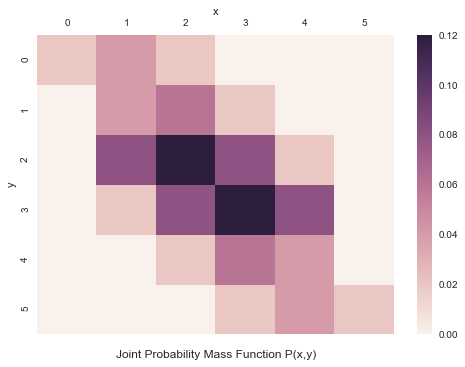

In [4]:
ax = sns.heatmap(pmf)
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Mass Function P(x,y)", y=-0.1)
plt.show()

## 주변 확률질량함수

두 확률변수 중 하나의 확률변수 값에 대해서만 확률분포를 표시한 함수 <br>
즉, 다변수가 되기 이전의 단변수 확률질량함수

결합 확률질량함수에서 주변 확률질량함수를 구하려면 <br>
전체 확률의 법칙에 의해 다른 변수가 가질 수 있는 모든 값의 결합확률질량함수를 합한 확률이 된다.

$\begin{align}%\label{}
\nonumber  P_X(x) = \sum_{y_i} f_{XY}(x,y_i) \\
\nonumber  P_Y(y) = \sum_{x_i} f_{XY}(x_i,y) \\
\end{align}$

In [5]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

array([ 0.02,  0.18,  0.3 ,  0.3 ,  0.18,  0.02])

array([[ 0.08],
       [ 0.12],
       [ 0.3 ],
       [ 0.3 ],
       [ 0.12],
       [ 0.08]])

## 조건부 확률질량함수

조건부 확률질량함수(conditional probability mass function)는 <br>
다변수 확률변수 중 하나의 값이 특정 값으로 고정되어 상수가 되어 버린 경우, <br> 
나머지 변수에 대한 확률질량함수를 말한다.

조건부 확률질량함수의 모양은 결합질량함수 PXY(x,y) 에서 y 값이 고정된 함수, 즉, 결합질량함수의 단면과 같아진다.

다만 조건부 확률질량함수의 합은 1이 된다.


# 다변수 연속확률변수의 결합/조건부확률

연속확률분포에서는 단변수 연속확률변수처럼 누적확률분포함수를 먼저 정의한 후 이를 미분하여 확률밀도함수를 정의하는 방법을 사용

## 결합 누적확률분포함수
$F_{XY}(x, y) = P(\{ X < x \} \cap \{ Y < y \}) = P(X < x, Y < y)$

구간의 끝을 나타내는 두 독립 변수 x, y 중 하나가 무한대 값을 가지는 경우 <br>
해당 변수의 값은 어떤 값을 가져도 상관없으므로 남은 하나의 변수에 대한 누적확률분포함수로 줄어든다. 이를 주변 누적확률분포(marginal cumulative probability distribution)이라고 한다.


## 결합 확률밀도함수

결합 누적확률분포함수를 미분하여 결합 확률밀도함수를 정의, 이 경우에는 독립 변수가 2개이므로 각각에 대해 모두 편미분(partial differentication)해야 함

특정 구간에 대해 적분하면 해당 구간에 대한 확률 <br>
모든 변수에 대해서 적분하면 값은 1

연속 확률 변수의 결합 확률 밀도 함수는 2차원 함수가 됨


(-5.0, 5.0, -5.0, 5.0)

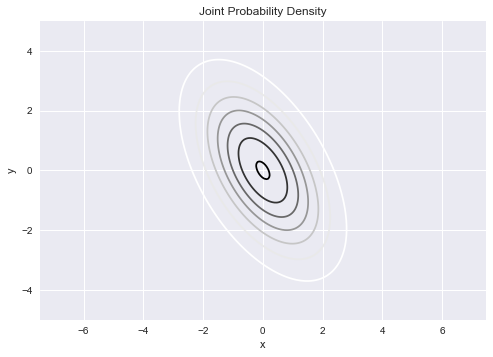

In [5]:
# 다변수 정규 분포의 결합 확률 밀도
mu = [0, 0]
cov = [[2, -1.4], [-1.4, 3.5]]
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(-5, 5, 200)
yy = np.linspace(-5, 5, 200)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]));
plt.contour(XX, YY, ZZ);
plt.xlabel("x");
plt.ylabel("y");
plt.title("Joint Probability Density");
plt.axis("equal");
plt.show()

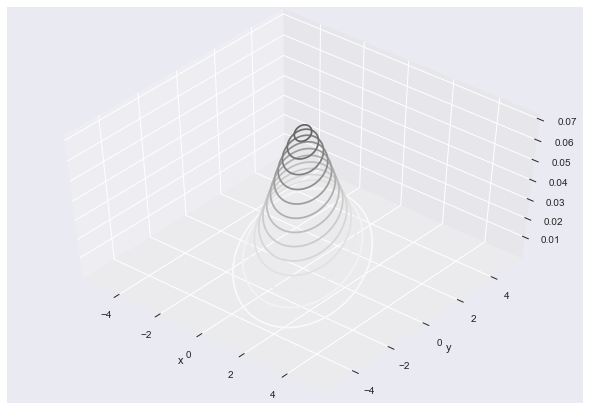

In [6]:
# 3차원으로 표현 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.contour(XX, YY, ZZ, levels=np.linspace(0, 0.1, 20))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(50, -50)
plt.show()

(-8, 8)

(-8, 8)

(0, 0.05)

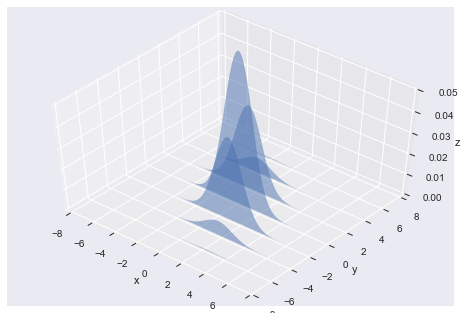

In [10]:

from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(-8, 8, 100)
yy = np.linspace(-8, 8, 9)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure()
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_xlim3d(-8, 8)
ax.set_ylabel('y')
ax.set_ylim3d(-8, 8)
ax.set_zlabel('z')
ax.set_zlim3d(0, 0.05)
ax.view_init(50, -50)
plt.show()

## 주변 확률밀도함수

결합 확률밀도함수를 특정한 하나의 변수에 대해 가중평균한 값 <br>
결합 확률밀도함수를 하나의 확률변수에 대해서만 적분하여 구함

2차원 확률 변수의 주변 확률 밀도 함수는 1차원 함수가 됨


(-3.5, 3.5)

(-3.5, 3.5)

(-3.5, 3.5)

(-3.5, 3.5)

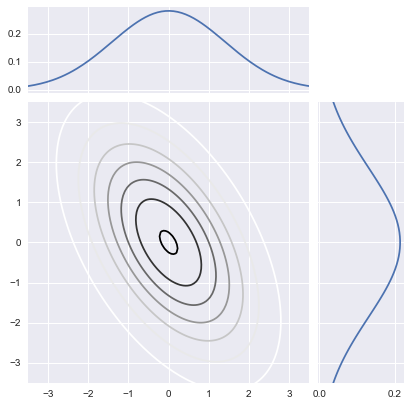

In [11]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(-5, 5, 200)
yy = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
fx = [simps(Z, yy) for Z in ZZ.T]
fy = [simps(Z, xx) for Z in ZZ]

plt.figure(figsize=(6,6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())

ax1.contour(XX, YY, ZZ)
ax2.plot(xx, fx)
base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
line = plt.plot(yy, fy, transform=rot + base)

ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-3.5, 3.5)
ax2.set_xlim(-3.5, 3.5)
ax3.set_ylim(-3.5, 3.5)
plt.show()

## 조건부 확률밀도함수

다변수 확률 변수 중 하나의 값이 특정 값이라는 사실이 알려진 경우, 이러한 조건(가정)에 의해 변화한 나머지 확률변수에 대한 확률밀도함수


(0, 0.35)

[]

(0, 0.35)

[]

(0, 0.35)

[]

(0, 0.35)

[]

(0, 0.35)

[]

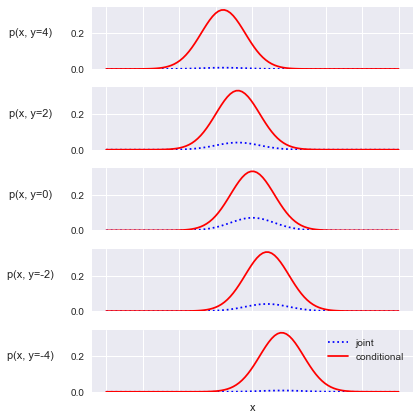

In [13]:
from scipy.integrate import simps # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(-8, 8, 100)
yy = np.linspace(-8, 8, 9)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

plt.figure(figsize=(6,6))

for i, j in enumerate(range(6, 1, -1)):
    ax = plt.subplot(5, 1, i + 1)
    plt.plot(xx, ZZ[j, :], 'b:', label="joint")
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal, 'r-', label="conditional");
    plt.ylim(0, 0.35)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.legend()
plt.show()

# 34절: 독립과 상관관계

# 확률밀도함수의 독립

만약 두 확률 변수 X , Y 의 결합 확률밀도함수(joint pdf)가 주변 확률밀도함수(marginal pdf)의 곱으로 나타나면 두 확률 변수가 서로 독립(independent)

$f_{XY}(x, y) = f_X(x)f_Y(y)$ 

Y 가 어떤 값을 가지더라도 확률밀도함수 f(X;Y)의 모양은 변하지 않음

## 반복시행

같은 확률변수에서 여러개의 표본 데이터를 취하는 경우에는 독립인 두 개의 확률변수에서 나온 표본으로 볼 수 있음

## 독립 확률변수의 기댓값

$\text{E}[XY] = \text{E}[X]\text{E}[Y]$


## 독립 확률변수의 분산

$\text{Var}[X+Y] = \text{Var}[X] + \text{Var}[Y]$

## 조건부 확률분포

독립인 두 확률변수 X,Y 의 조건부 확률밀도함수는 주변 확률밀도함수와 같다.

확률 변수 X 가 다른 확률 변수 Y 에 독립이면 조건부 확률 분포가 조건이 되는 확률 변수의 값에 영향을 받지 않는다. 즉, Y 값이 y1 일 때와  y2 일 때의 조건부 확률 분포 f(x∣y1) 과  f(x∣y2) 이 같다는 의미이다.


# 공분산과 상관계수

## 샘플 공분산

$s^2_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-m_x)(y_i-m_y)$

샘플 공분산도 자료가 평균값으로부터 얼마나 떨어져 있는지를 나타낸것

공분산의 부호는 자료가 같은 부호를 가지는지 다른 부호를 가지는지에 대한 일종의 방향성을 제시
 
자료 분포의 방향성만 분리하여 보는 것이 유용

## 샘플 상관계수

공분산을 각각의 샘플 표준편차값으로 나누어 정규화(normalize)하여 정의


## 확률변수의 공분산과 상관계수

$\text{Cov}[X, Y] = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]$ 

ρ=1  : 완전선형 상관관계
ρ=0  : 무상관 (독립과는 다름)
ρ=−1  : 완전선형 반상관관계

상관계수로 분포의 형상을 추측할 때 주의할 점은 개별 자료가 상관계수에 미치는 영향력이 각각 다르다는 점

나머지 자료의 상관계수가 정확히 1 또는 0인 경우에도 단 하나의 특이값 자료에 의해 전체 상관계수가 크게 달라질 수 있다.


### 다변수 확률 변수의 공분산

데이터가 벡터인 경우에는 다음과 같이 샘플 공분산 행렬을 정의

여기에서  XX 는 평균을 제거하여 샘플 평균이 0이 된 데이터 행렬(feature matrix)를 뜻 함 

$\Sigma = \text{Cov}[X, Y] = \text{E} \left[ (X - \text{E}[X])(Y - \text{E}[Y])^T \right]$



# 다변수 가우시안 정규 분포

다변수 정규 분포(MVN: Multivariate Normal)는 복수의 확률 변수를 모형화하는데 가장 많이 사용되는 분포

D 차원 다변수 정규 분포의 확률 밀도 함수는 평균 벡터 μ 와 공분산 행렬 Σ 라는 두 개의 모수를 가짐 <br>
공분산 행렬은 역행렬이 존재하는 대칭 행렬이어야 함

x∈RD  확률 변수 벡터
μ∈RD  평균 벡터
Σ∈RD×D  공분산 벡터
Σ−1∈RD×D  공분산 벡터의 역행렬


## SciPy의 다변수 정규 분포 지원

multivariate_normal 클래스(평균 벡터를 mean, 공분산 행렬 cov 인수)

## 다변수 정규 분포의 예

2차원(D=2) 다변수 정규 분포

$x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$

예) 

$\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}. \;\;\;
\Sigma = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}$

이면

$| \Sigma| = 1. \;\;\;
\Sigma^{-1} = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}$

$\mathcal{N}(x_1, x_2) = \dfrac{1}{2\pi}
\exp \left( -\dfrac{1}{2} \left( (x_1 - 2)^2 + (x_2 - 3)^2 \right) \right)$


(0.0, 4.0, 1.0, 5.0)

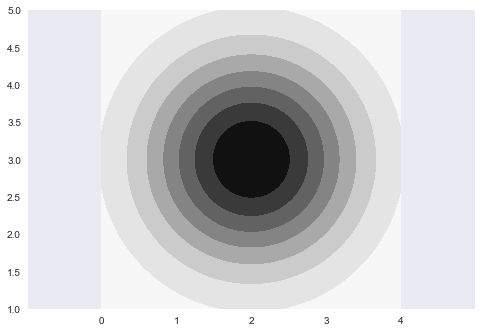

In [2]:
mu = [2, 3]
cov = [[1, 0], [0, 1]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.show()

## 다변수 정규 분포의 최적화

모수에 대해 최적화 

어떤 함수에 로그를 취해도 최고점이나 최저점의 위치는 변하지 않기 때문에 문제를 쉽게 하기 위해 로그를 취한 분포함수를 최적화
